In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import datetime
from datetime import datetime

In [2]:
# Get current date in YYYY-MM-DD format
current_date = datetime.now().strftime('%Y-%m-%d')

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_columns))

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
# Identify numerical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:", list(numerical_columns))


Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [12]:
# Print value counts for each categorical column
print("\nValue counts for each categorical column:")
print("==========================================")
for categorical_column in categorical_columns:
    print(f"\nColumn: {categorical_column}")
    print(df_train[categorical_column].value_counts())
    print("Null values:", df_train[categorical_column].isnull().sum())
    print("------------------------------------------------------")


Value counts for each categorical column:

Column: Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Null values: 0
------------------------------------------------------

Column: Sex
Sex
male      577
female    314
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: Ticket
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name:

In [13]:
#Initialize transformers
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

In [14]:
def get_categorical_numerical_columns(df):
    """Identify categorical and numerical columns"""
    categorical_columns = df.select_dtypes(include=['object']).columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    # Exclude 'PassengerId' and 'Survived' from features
    numerical_columns = numerical_columns.drop(['PassengerId', 'Survived'] if 'Survived' in numerical_columns else ['PassengerId'])
    return list(categorical_columns), list(numerical_columns)

In [15]:
def process_numerical(df, is_training=True):
    """Handle missing values in numerical columns"""
    global num_imputer  # Make it accessible for both training and test
    _, numerical_columns = get_categorical_numerical_columns(df)

    if is_training:
        num_imputer = SimpleImputer(strategy='median')
        df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = num_imputer.transform(df[numerical_columns])

    return df

In [16]:
def scale_features(df, is_training=True):
    """Scale numerical features"""
    global scaler  # Make it accessible for both training and test
    _, numerical_columns = get_categorical_numerical_columns(df)

    if is_training:
        scaler = StandardScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = scaler.transform(df[numerical_columns])

    return df

In [17]:
def process_categorical(df, is_training=True):
    """Handle missing values and encode categorical columns"""
    global cat_imputer, encoder  # Make them accessible for both training and test
    categorical_columns, _ = get_categorical_numerical_columns(df)

    # Remove 'Name', 'Ticket', and 'Cabin' from encoding (high cardinality)
    encode_columns = [col for col in categorical_columns if col not in ['Name', 'Ticket', 'Cabin']]

    if is_training:
        # Impute missing values
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[encode_columns] = cat_imputer.fit_transform(df[encode_columns])

        # Encode categorical variables
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_features = encoder.fit_transform(df[encode_columns])
    else:
        df[encode_columns] = cat_imputer.transform(df[encode_columns])
        encoded_features = encoder.transform(df[encode_columns])

    # Create encoded DataFrame
    encoded_feature_names = encoder.get_feature_names_out(encode_columns)
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

    # Drop original categorical columns and add encoded ones
    df = df.drop(columns=encode_columns)
    df = pd.concat([df, encoded_df], axis=1)

    return df

In [18]:
def feature_engineering(df):
    """Create new features"""
    # Create family size feature
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Create is_alone feature
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Extract title from Name
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Group rare titles
    rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 
                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    return df


In [27]:
def prepare_data(df, is_training=True):
    """Main function to prepare data"""
    # Create copy of dataframe
    df = df.copy()

    # Feature engineering
    df = feature_engineering(df)

    # Process numerical and categorical data
    df = process_numerical(df, is_training)
    df = scale_features(df, is_training)
    df = process_categorical(df, is_training)

    # Drop unnecessary columns
    columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
    # Don't drop 'Survived' for training data
    if not is_training and 'Survived' in df.columns:
        columns_to_drop.append('Survived')

    df = df.drop(columns=columns_to_drop)

    return df

In [28]:
df_train_processed = prepare_data(df_train.copy(), is_training=True)
df_test_processed = prepare_data(df_test.copy(), is_training=False)

In [29]:
df_train_processed.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
FamilySize      0
IsAlone         0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
dtype: int64

In [22]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        891 non-null    float64
 1   Age           891 non-null    float64
 2   SibSp         891 non-null    float64
 3   Parch         891 non-null    float64
 4   Fare          891 non-null    float64
 5   FamilySize    891 non-null    float64
 6   IsAlone       891 non-null    int32  
 7   Sex_female    891 non-null    float64
 8   Sex_male      891 non-null    float64
 9   Embarked_C    891 non-null    float64
 10  Embarked_Q    891 non-null    float64
 11  Embarked_S    891 non-null    float64
 12  Title_Master  891 non-null    float64
 13  Title_Miss    891 non-null    float64
 14  Title_Mr      891 non-null    float64
 15  Title_Mrs     891 non-null    float64
 16  Title_Rare    891 non-null    float64
dtypes: float64(16), int32(1)
memory usage: 115.0 KB


In [30]:
df_test_processed.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
FamilySize      0
IsAlone         0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
dtype: int64

In [24]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    float64
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    float64
 3   Parch         418 non-null    float64
 4   Fare          418 non-null    float64
 5   FamilySize    418 non-null    float64
 6   IsAlone       418 non-null    int32  
 7   Sex_female    418 non-null    float64
 8   Sex_male      418 non-null    float64
 9   Embarked_C    418 non-null    float64
 10  Embarked_Q    418 non-null    float64
 11  Embarked_S    418 non-null    float64
 12  Title_Master  418 non-null    float64
 13  Title_Miss    418 non-null    float64
 14  Title_Mr      418 non-null    float64
 15  Title_Mrs     418 non-null    float64
 16  Title_Rare    418 non-null    float64
dtypes: float64(16), int32(1)
memory usage: 54.0 KB


In [31]:
correlation_matrix_train = df_train_processed.corr()
print(correlation_matrix_train)

              Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived      1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
Pclass       -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
Age          -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
SibSp        -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
Parch         0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
Fare          0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
FamilySize    0.016639  0.065997 -0.245619  0.890712  0.783111  0.217138   
IsAlone      -0.203367  0.135207  0.171647 -0.584471 -0.583398 -0.271832   
Sex_female    0.543351 -0.131900 -0.081163  0.114631  0.245489  0.182333   
Sex_male     -0.543351  0.131900  0.081163 -0.114631 -0.245489 -0.182333   
Embarked_C    0.168240 -0.243292  0.030248 -0.059528 -0.011069  0.269335   
Embarked_Q    0.003650  0.221009 -0.031415 -0.026354 -0.081228 -0.117216   
Embarked_S  

In [32]:
print("\nCorrelations with Survived:")
print(correlation_matrix_train["Survived"].sort_values(ascending=False))


Correlations with Survived:
Survived        1.000000
Sex_female      0.543351
Title_Mrs       0.341994
Title_Miss      0.335636
Fare            0.257307
Embarked_C      0.168240
Title_Master    0.085221
Parch           0.081629
FamilySize      0.016639
Embarked_Q      0.003650
Title_Rare     -0.012054
SibSp          -0.035322
Age            -0.064910
Embarked_S     -0.149683
IsAlone        -0.203367
Pclass         -0.338481
Sex_male       -0.543351
Title_Mr       -0.549199
Name: Survived, dtype: float64


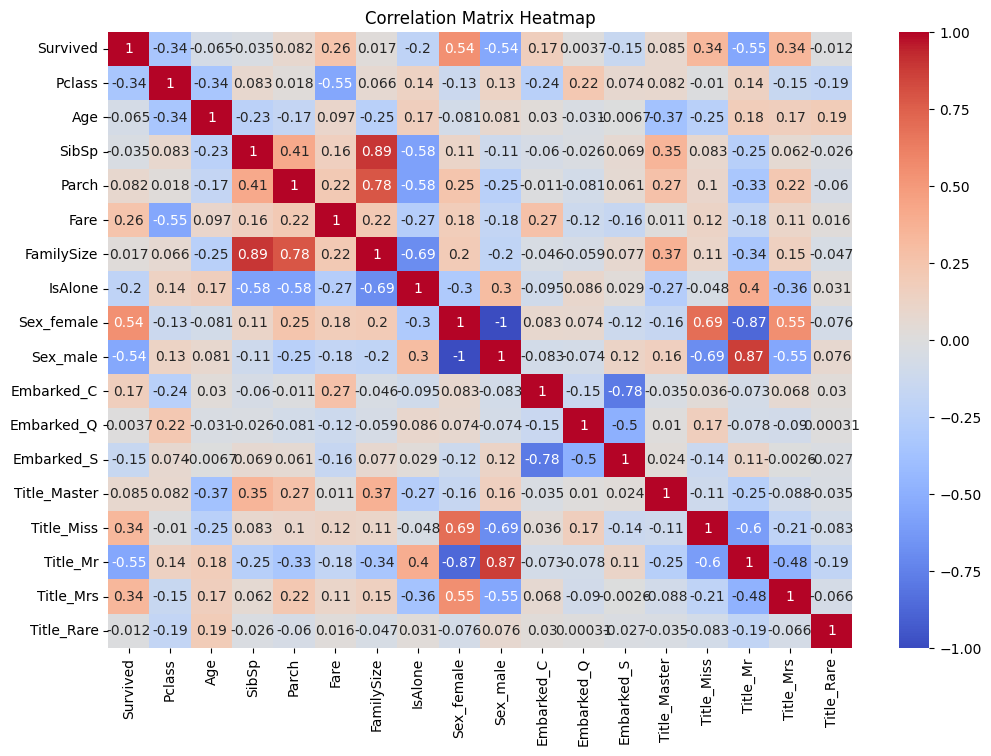

In [33]:
# Optionally, create a heatmap visualization
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
# Prepare training data
X = df_train_processed.drop('Survived', axis=1)
y = df_train_processed['Survived']  # No need for log transform as this is a binary classification


In [39]:
# Save PassengerId from test data (if needed for submission)
test_ids = df_test['PassengerId']
X_test = df_test_processed

print("Training features shape:", X.shape)
print("Training target shape:", y.shape)
print("Test features shape:", X_test.shape)

# Quick look at the data
print("\nFeature columns:", X.columns.tolist())
print("\nFirst few rows of training features:")
print(X.head())

Training features shape: (891, 17)
Training target shape: (891,)
Test features shape: (418, 17)

Feature columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

First few rows of training features:
     Pclass       Age     SibSp     Parch      Fare  FamilySize  IsAlone  \
0  0.827377 -0.565736  0.432793 -0.473674 -0.502445    0.059160        0   
1 -1.566107  0.663861  0.432793 -0.473674  0.786845    0.059160        0   
2  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   -0.560975        1   
3 -1.566107  0.433312  0.432793 -0.473674  0.420730    0.059160        0   
4  0.827377  0.433312 -0.474545 -0.473674 -0.486337   -0.560975        1   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Title_Master  \
0         0.0       1.0         0.0         0.0         1.0           0.0   
1         1.0       0.0        

In [42]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced split for binary classification
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (712, 17)
Validation set shape: (179, 17)
Test set shape: (418, 17)


In [35]:
### Train

In [43]:
# Cell 10: Train XGBoost model
import xgboost as xgb

In [64]:
# Define hyperparameters
hyperparameters = {
    'n_estimators': 500,
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'random_state': 42,
    'tree_method': 'hist',  # Faster tree method
    'eval_metric': 'logloss',  # For binary classification
    'early_stopping_rounds': 20,  # Stop if no improvement after 20 rounds
    'verbosity': 1  # Show some training information
}

In [65]:
# Create and train the model
model = xgb.XGBClassifier(**hyperparameters)

# Simple fit without early stopping
#model.fit(X_train, y_train)

# Fit with evaluation set
model.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

[0]	validation_0-logloss:0.66083	validation_1-logloss:0.66245
[1]	validation_0-logloss:0.65628	validation_1-logloss:0.65884
[2]	validation_0-logloss:0.65156	validation_1-logloss:0.65492
[3]	validation_0-logloss:0.64686	validation_1-logloss:0.65108
[4]	validation_0-logloss:0.64227	validation_1-logloss:0.64791
[5]	validation_0-logloss:0.63796	validation_1-logloss:0.64439
[6]	validation_0-logloss:0.63342	validation_1-logloss:0.64092
[7]	validation_0-logloss:0.62889	validation_1-logloss:0.63707
[8]	validation_0-logloss:0.62448	validation_1-logloss:0.63332
[9]	validation_0-logloss:0.62030	validation_1-logloss:0.62998
[10]	validation_0-logloss:0.61635	validation_1-logloss:0.62692
[11]	validation_0-logloss:0.61240	validation_1-logloss:0.62360
[12]	validation_0-logloss:0.60846	validation_1-logloss:0.62050
[13]	validation_0-logloss:0.60455	validation_1-logloss:0.61736
[14]	validation_0-logloss:0.60061	validation_1-logloss:0.61391
[15]	validation_0-logloss:0.59669	validation_1-logloss:0.61062
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [66]:
# Make predictions on validation set
y_pred = model.predict(X_val)

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print model performance
print("\nModel Performance on Validation Set:")
print("====================================")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Model Performance on Validation Set:

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [68]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))



Confusion Matrix:
[[101   9]
 [ 23  46]]


In [69]:
print("\nAccuracy Score:", accuracy_score(y_val, y_pred))



Accuracy Score: 0.8212290502793296


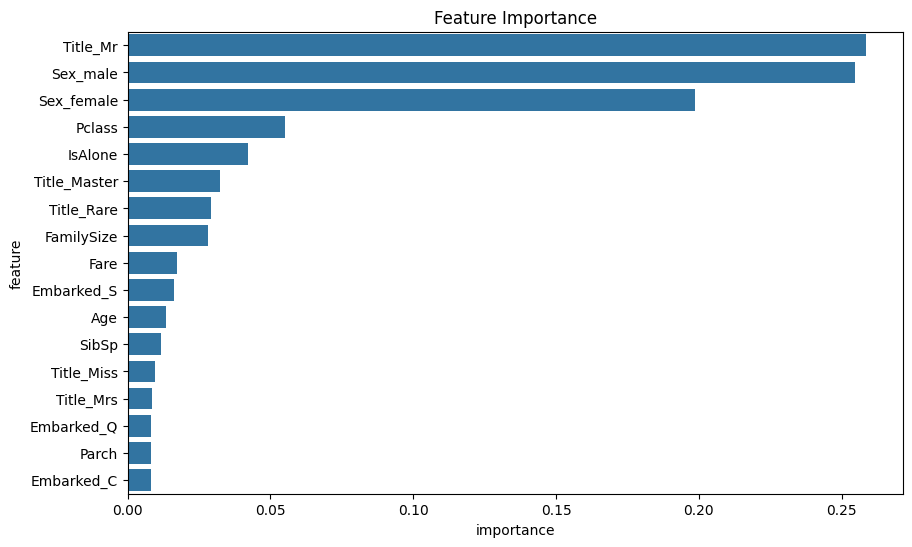

In [70]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [71]:
# Make predictions on test set
test_predictions = model.predict(X_test)

In [72]:
# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': test_predictions
})


In [73]:
# Save processed training data with target
df_train_processed_with_target = X.copy()
df_train_processed_with_target['Survived'] = y
df_train_processed_with_target.to_csv(f'data-out/train-processed-{current_date}.csv', index=False)

# Save processed test data
X_test.to_csv(f'data-out/test-processed-{current_date}.csv', index=False)

In [74]:
submission.to_csv(f'data-out/predictions-{current_date}.csv', index=False)
print(f"Saved submission to: data-out/predictions-{current_date}.csv")

Saved submission to: data-out/predictions-2024-12-16.csv


In [75]:
# Optional: Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
         feature  importance
14      Title_Mr    0.258431
8       Sex_male    0.254580
7     Sex_female    0.198817
0         Pclass    0.055087
6        IsAlone    0.042017
12  Title_Master    0.032271
16    Title_Rare    0.029016
5     FamilySize    0.028039
4           Fare    0.017170
11    Embarked_S    0.016255
